<a href="https://colab.research.google.com/github/dk-agathya/Profile/blob/main/RNN%2C_LSTM_Models_%26_GRU_Models%2C_Transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **RNN, LSTM Models & GRU Models**


- Neural Networks (NNs) are a foundational concept in machine learning, inspired by the structure and function of the human brain.
- At their core, NNs consist of interconnected nodes organized into layers.
- Input layers receive data, hidden layers process information, and output layers produce results.
- The strength of NNs lies in their ability to learn from data, adjusting internal parameters (weights) during training to optimize performance.

## Unraveling Forward and Backward Propagation
- In the forward propagation phase, data travels through the network, and computations occur at each layer, generating predictions.
- It’s similar to information flowing from input to output.


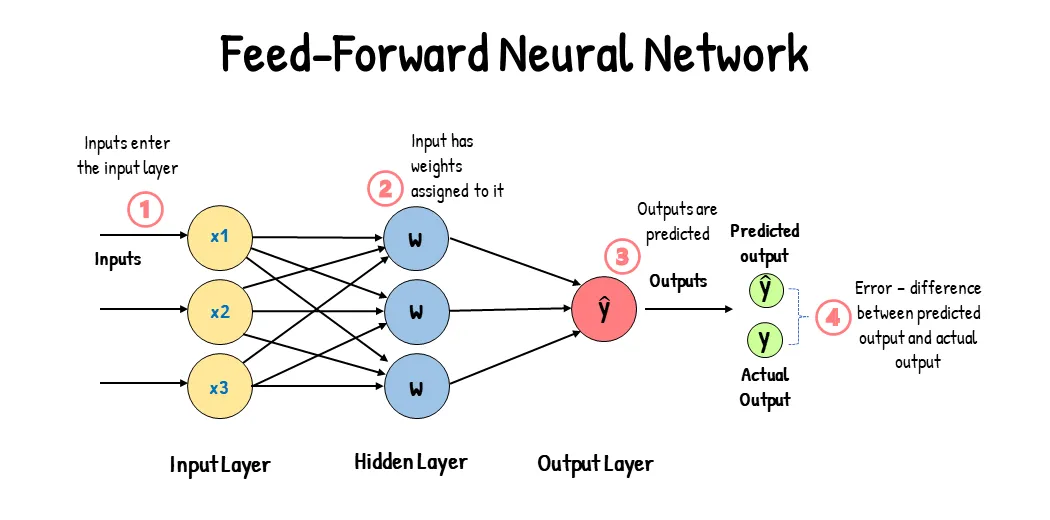

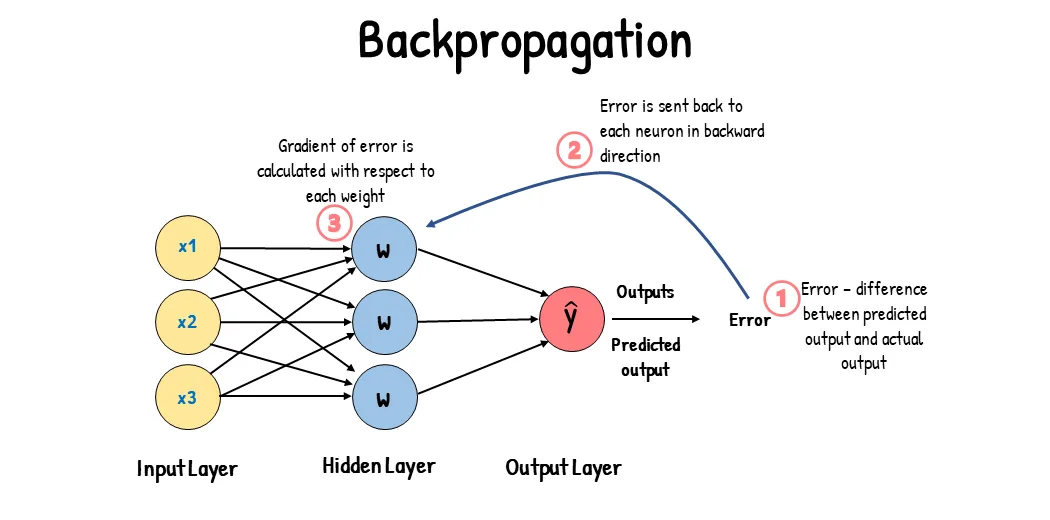

- The backward propagation phase involves the crucial aspect of learning.
- Through techniques like **gradient descent**, the network refines its internal parameters by **calculating the gradient** of the **loss function** with respect to the weights.
- The **chain rule** plays a pivotal role here, allowing the network to attribute the loss to specific weights, enabling fine-tuning for better accuracy.


- Gradient Descent
  - Gradient descent is the driving force behind weight adjustments in NNs.
  - It’s an optimization algorithm that minimizes the loss function by iteratively moving toward the steepest downhill direction in the multidimensional weight space.
  - This iterative adjustment of weights enhances the network’s predictive accuracy.



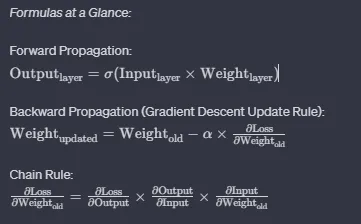

- Chain Rule
  - The chain rule in calculus is the linchpin for backpropagation.
  - It enables the computation of partial derivatives, attributing the network’s overall error to individual weights.
  - This decomposition is crucial for making nuanced adjustments during training.


Importance of Sequences in NLP Tasks
In Natural Language Processing (NLP), understanding and processing sequences is crucial. Unlike traditional machine learning tasks where data points are independent, language inherently involves sequential information. In NLP, the order of words in a sentence carries meaning, and context from previous words influences the interpretation of subsequent ones.



## Recurrent Neural Networks (RNNs)

Recurrent Neural Networks (RNN)
RNNs are a specialized form of NN designed to handle sequential data.

> They introduce the concept of memory, enabling the network to retain information about previous inputs. This memory is crucial for tasks where context matters, such as language understanding and generation.

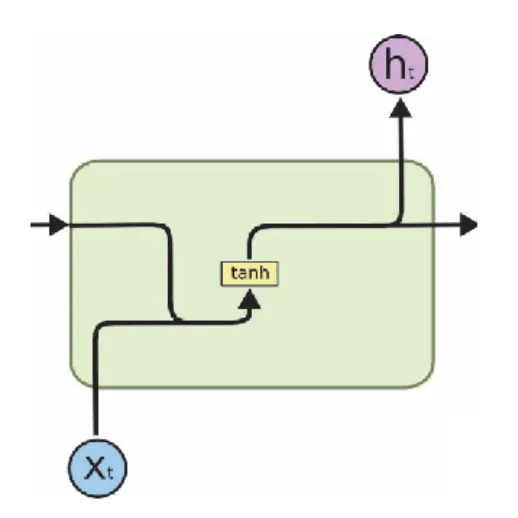

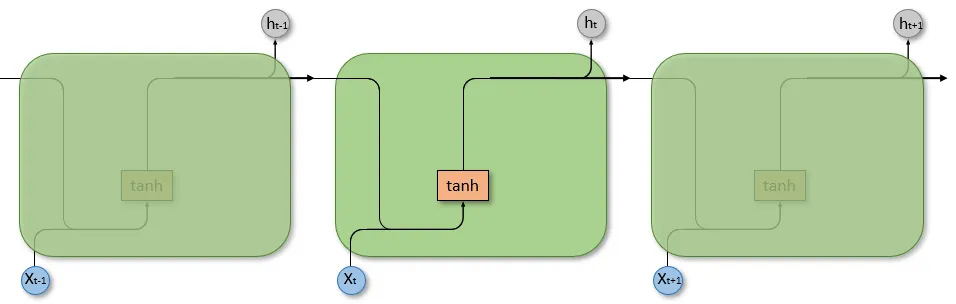

#### Key Concept
- RNNs process data step-by-step, carrying information forward to make informed decisions.

#### Visuals
- Diagrams illustrating the recurrent loop, input flow, hidden state, and output generation.

#### Applications
- Machine translation
- Next-word prediction
- Sentiment analysis

#### Vanishing Gradients
- RNNs struggle to connect information over long time steps, impacting complex language tasks.




#### The Solution
**LSTMs** address RNN's gradient problem.

##### **Hidden State**
It serves as a short-term memory

##### **Cell State**
It serves as a long-term memory highway.

#### **Gated Mechanism**
- Input, forget, and output gates act as bouncers at a club, deciding who gets in/out of memory.

> - Input Gate: Determines which values from the input should be used to modify the memory.
- Forget Gate: Decides what portions of the existing memory should be discarded.
- Output Gate: Controls the output flow of the memory content to the next layer in the network.




#### Real-world Example
LSTMs excel in tasks requiring consistency over time, like writing a long article.




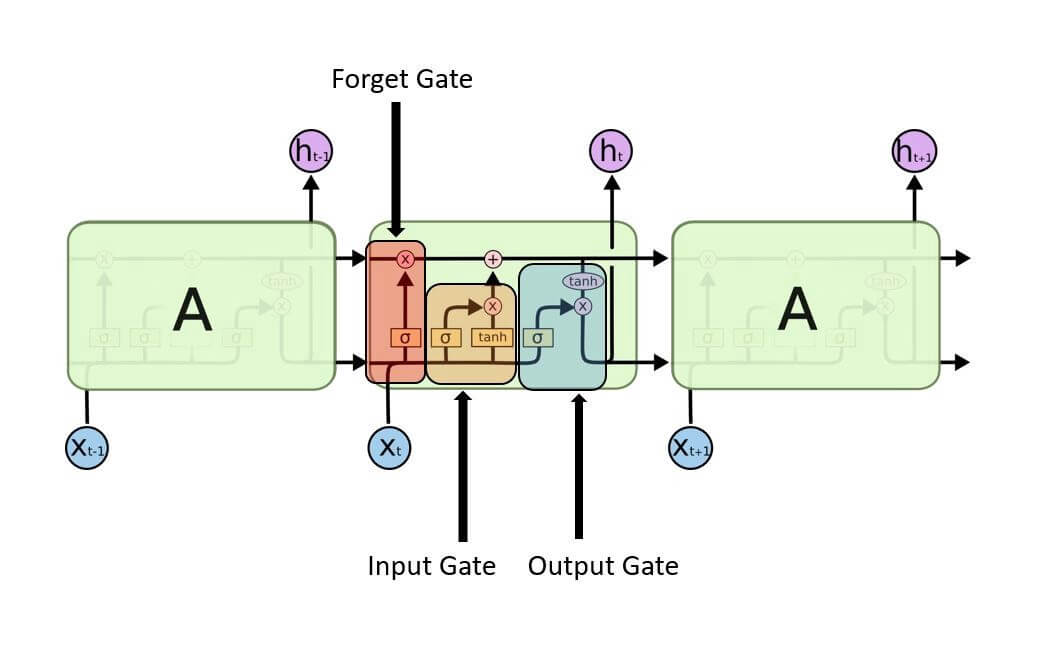

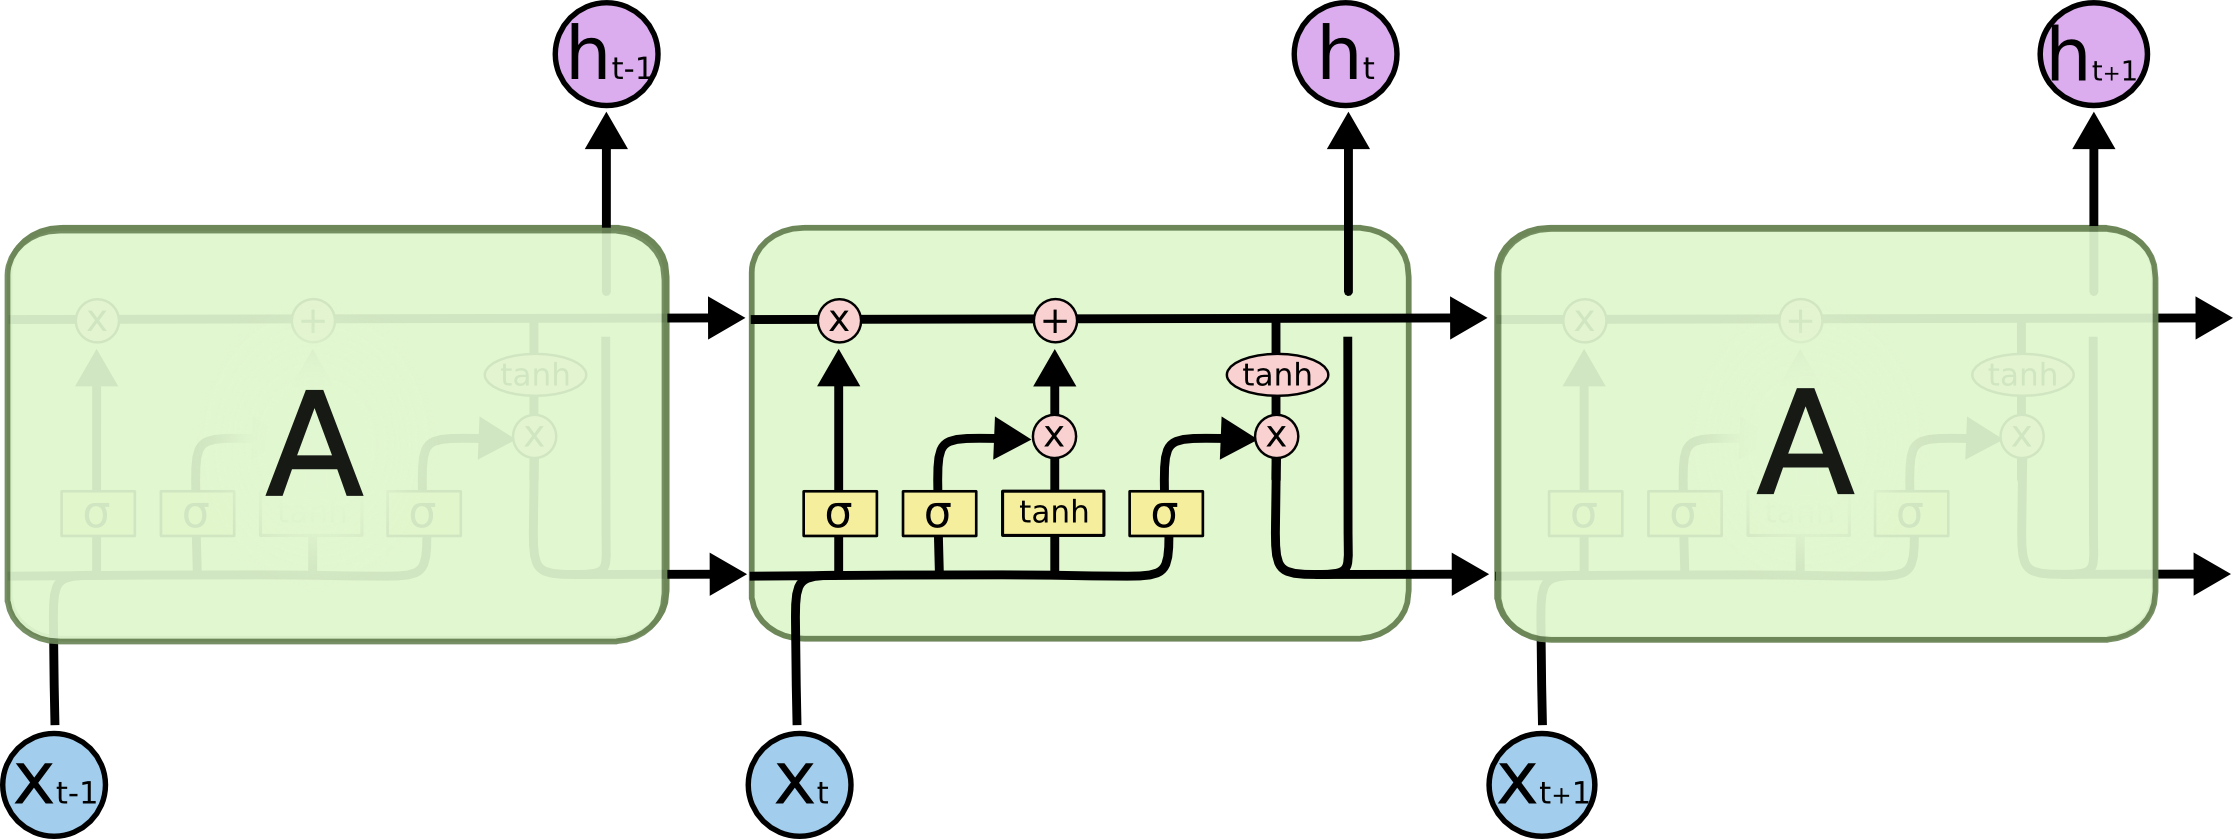

#### Gated Recurrent Units (GRUs)

#### Streamlining LSTMs
GRUs are simplified LSTM variants without a separate cell state, known for their efficiency.

#### **Update and Reset Gates**
Similar to LSTMs, these gates control information flow.

#### When to use GRUs
"If you need LSTM-level performance but want a faster model, GRU is often a great choice."

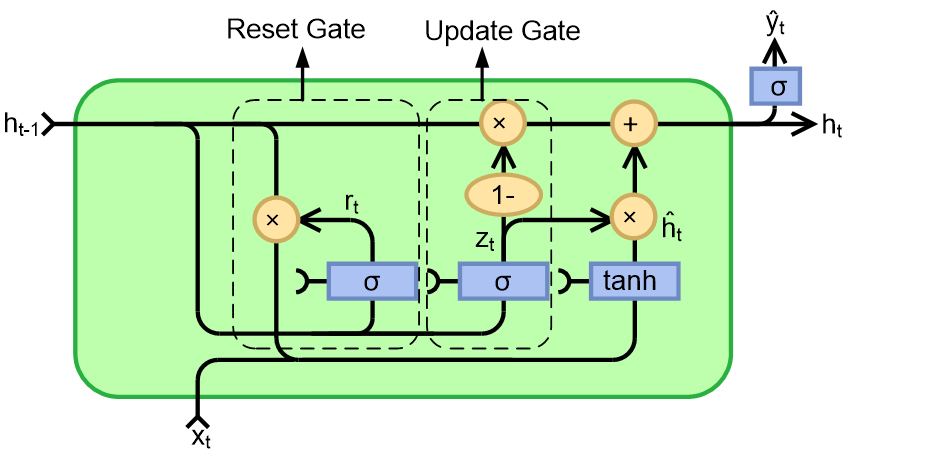

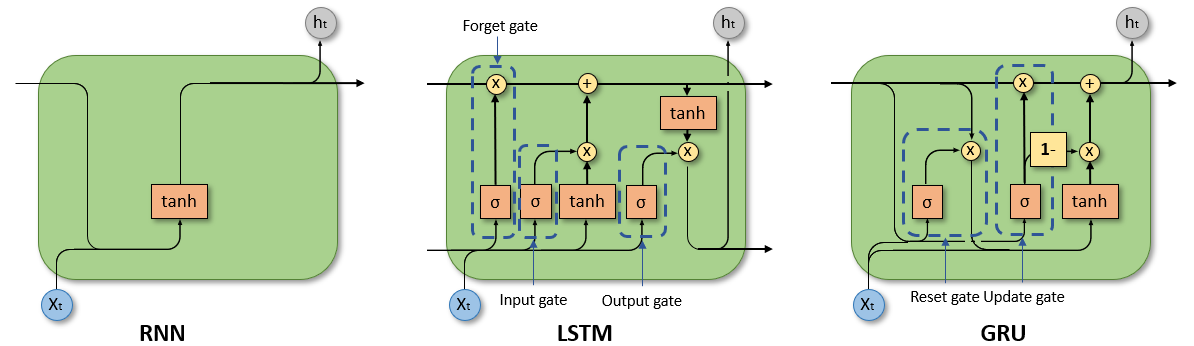

| Feature          | RNN     | LSTM     | GRU      |
|------------------|---------|----------|----------|
| Long-term deps.  | Limited | Excellent| Very Good|
| Complexity       | Low     | High     | Medium   |
| Speed            | Fast    | Slow     | Faster   |


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, GRU, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
# Toy text data
text_data = [
    "This is the first document.",
    "This document is the second document.",
    "And this is the third one.",
    "Is this the first document?"
]

In [3]:
# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
total_words = len(tokenizer.word_index) + 1

In [4]:
# Create input sequences and labels for training
input_sequences = []
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


In [5]:
max_sequence_length = max(len(seq) for seq in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=max_sequence_length, padding='pre')

In [6]:
X, y = input_sequences[:, :-1], input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

In [7]:
# Build and train the SimpleRNN model
model_rnn = Sequential()
model_rnn.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_rnn.add(SimpleRNN(100))
model_rnn.add(Dense(total_words, activation='softmax'))
model_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_rnn.fit(X, y, epochs=100, verbose=0)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(total_words, activation='softmax'))
model_lstm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_lstm.fit(X, y, epochs=100, verbose=0)

In [9]:
# Build and train the GRU model
model_gru = Sequential()
model_gru.add(Embedding(total_words, 50, input_length=max_sequence_length-1))
model_gru.add(GRU(100))
model_gru.add(Dense(total_words, activation='softmax'))
model_gru.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model_gru.fit(X, y, epochs=100, verbose=0)

In [10]:
# Generate text using the trained models
def generate_text(seed_text, model, max_sequence_len, num_words):
    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

In [11]:
# Example of generating text with each model
generated_text_rnn = generate_text("This is", model_rnn, max_sequence_length, num_words=5)
generated_text_gru = generate_text("This is", model_gru, max_sequence_length, num_words=5)
generated_text_lstm = generate_text("This is", model_lstm, max_sequence_length, num_words=5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [12]:
print("Generated Text (SimpleRNN):", generated_text_rnn)
print("Generated Text (GRU):", generated_text_gru)
print("Generated Text (LSTM):", generated_text_lstm)

Generated Text (SimpleRNN): This is the first document document is
Generated Text (GRU): This is the first document document document
Generated Text (LSTM): This is the first document document document
